In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d umairshahpirzada/birds-20-species-image-classification

 82% 57.0M/69.3M [00:00<00:00, 74.4MB/s]
100% 69.3M/69.3M [00:00<00:00, 79.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/birds-20-species-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode='min',verbose=1,patience=25)



In [ ]:
 # generators
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',labels='inferred',label_mode="int",
                                          batch_size=32,image_size=(256, 256))

validation_ds=keras.utils.image_dataset_from_directory(directory='/content/valid',labels='inferred',label_mode="int",
                                      batch_size=32,image_size=(256, 256))
test_ds=keras.utils.image_dataset_from_directory(directory='/content/test',labels='inferred',label_mode="int",
                                         batch_size=32,image_size=(256, 256))

Found 3208 files belonging to 20 classes.
Found 100 files belonging to 20 classes.
Found 100 files belonging to 20 classes.


In [ ]:
class_names=train_ds.class_names
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

In [ ]:
for image,label in train_ds.take(1):
  print (image.shape)
  print (label.numpy())

(32, 256, 256, 3)
[ 2 10 11  4 15 19  1 15  7  5 13  4  8 15  0  6  1  9 12 11 12 16 15  9
  4 11 15 14  7  4 19  9]


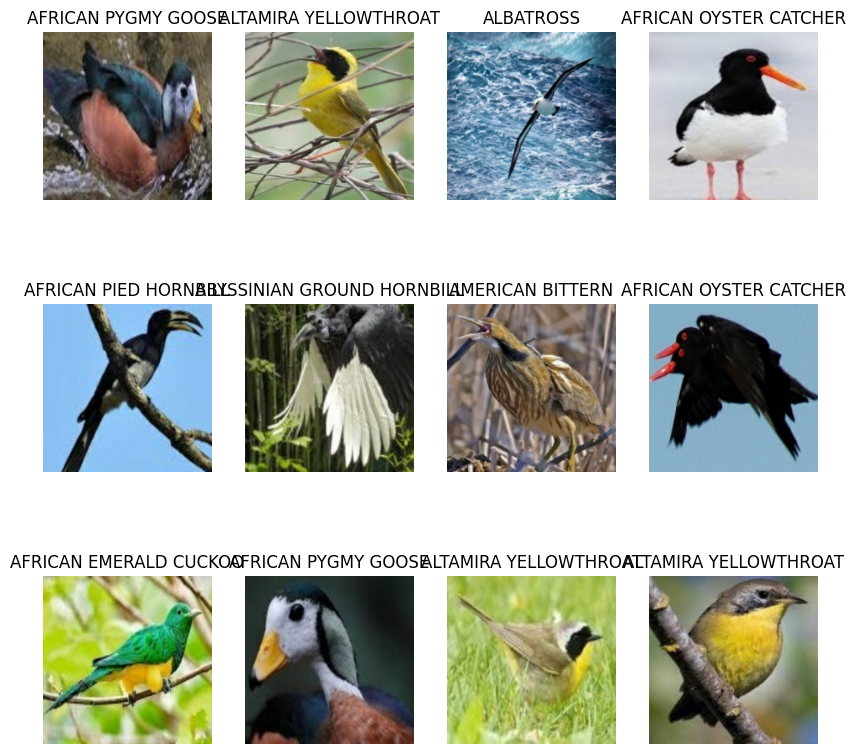

In [ ]:
plt.figure(figsize=(10,10))
for image,label in train_ds.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds=validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)
test_ds=test_ds.map(process)

In [ ]:
#create CNN MODEL
model=Sequential()
#model.add(resize_and_rescale)
#model.add(data_augmentation)
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=50,validation_data=validation_ds,callbacks=[early_stop])

Epoch 1/50
101/101 [==============================] - 28s 96ms/step - loss: 6.1570 - accuracy: 0.1543 - val_loss: 11.9568 - val_accuracy: 0.0600
Epoch 2/50
101/101 [==============================] - 9s 86ms/step - loss: 2.7815 - accuracy: 0.2101 - val_loss: 23.6221 - val_accuracy: 0.0600
Epoch 3/50
101/101 [==============================] - 9s 86ms/step - loss: 2.5207 - accuracy: 0.2781 - val_loss: 11.5123 - val_accuracy: 0.0800
Epoch 4/50
101/101 [==============================] - 8s 84ms/step - loss: 2.3409 - accuracy: 0.3270 - val_loss: 3.7081 - val_accuracy: 0.1800
Epoch 5/50
101/101 [==============================] - 9s 87ms/step - loss: 2.2044 - accuracy: 0.3800 - val_loss: 3.5797 - val_accuracy: 0.2500
Epoch 6/50
101/101 [==============================] - 9s 86ms/step - loss: 2.0640 - accuracy: 0.4161 - val_loss: 2.1877 - val_accuracy: 0.3700
Epoch 7/50
101/101 [==============================] - 9s 87ms/step - loss: 1.9390 - accuracy: 0.4302 - val_loss: 3.6007 - val_accuracy: 0.

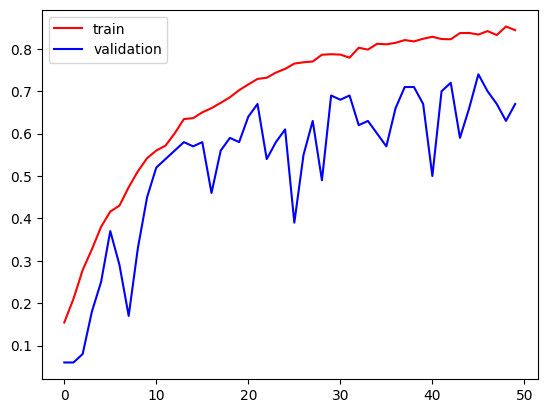

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

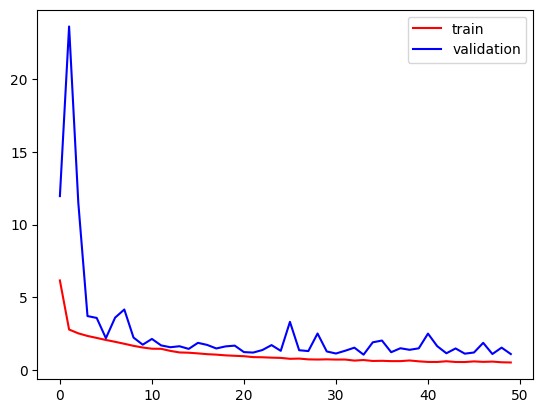

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
scores=model.evaluate(test_ds)

4/4 [==============================] - 0s 26ms/step - loss: 1.3557 - accuracy: 0.7000


In [ ]:
scores

[1.3557260036468506, 0.699999988079071]

In [ ]:
for image,label in test_ds.take(1):
  print (image.shape)
  print (label.numpy())

(32, 256, 256, 3)
[10  3  9  1 16  2 17  3  5 11  4  3  1 11 13  1 19  2  1 18 13  1 13  7
 11  8  3  7 15  8 12 10]


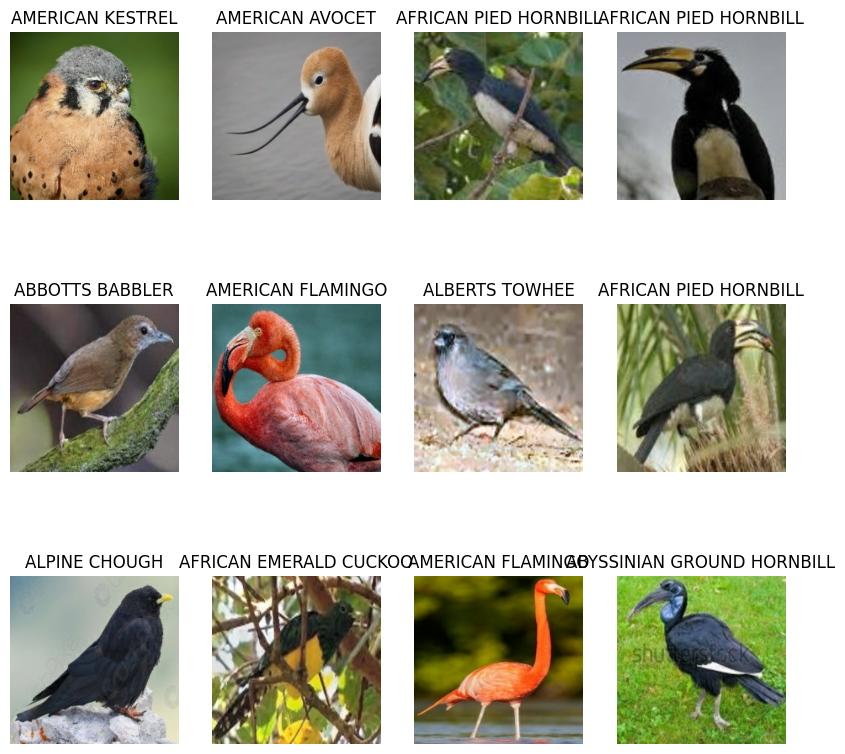

In [ ]:
plt.figure(figsize=(10,10))
for image,label in train_ds.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy())
    plt.title(class_names[label[i]])
    plt.axis("off")

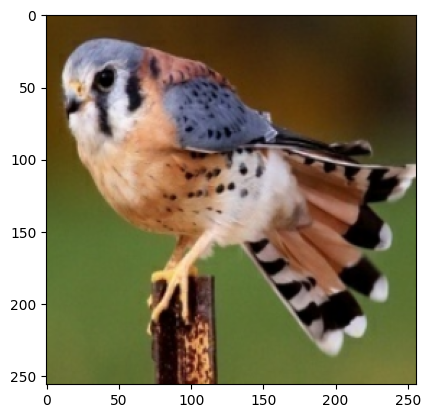

In [ ]:
for image,label in test_ds.take(1):
  plt.imshow(image[0].numpy())



first image to predict
actual_label AMERICAN KESTREL
1/1 [==============================] - 0s 34ms/step
predicted_label AMERICAN KESTREL


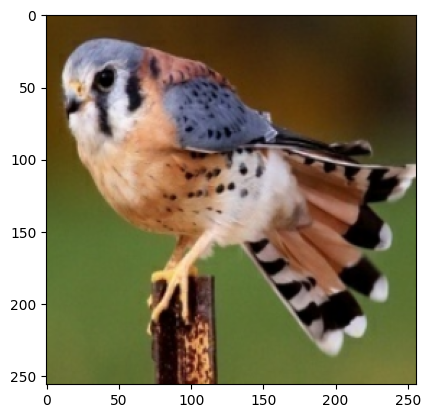

In [ ]:
import numpy as np
for image,label in test_ds.take(1):
  first_image=image[0].numpy()
  first_label=label[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print('actual_label',class_names[first_label])

  batch_prediction=model.predict(image)
  print('predicted_label',class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)   # create a batch

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100 * (np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 23ms/step


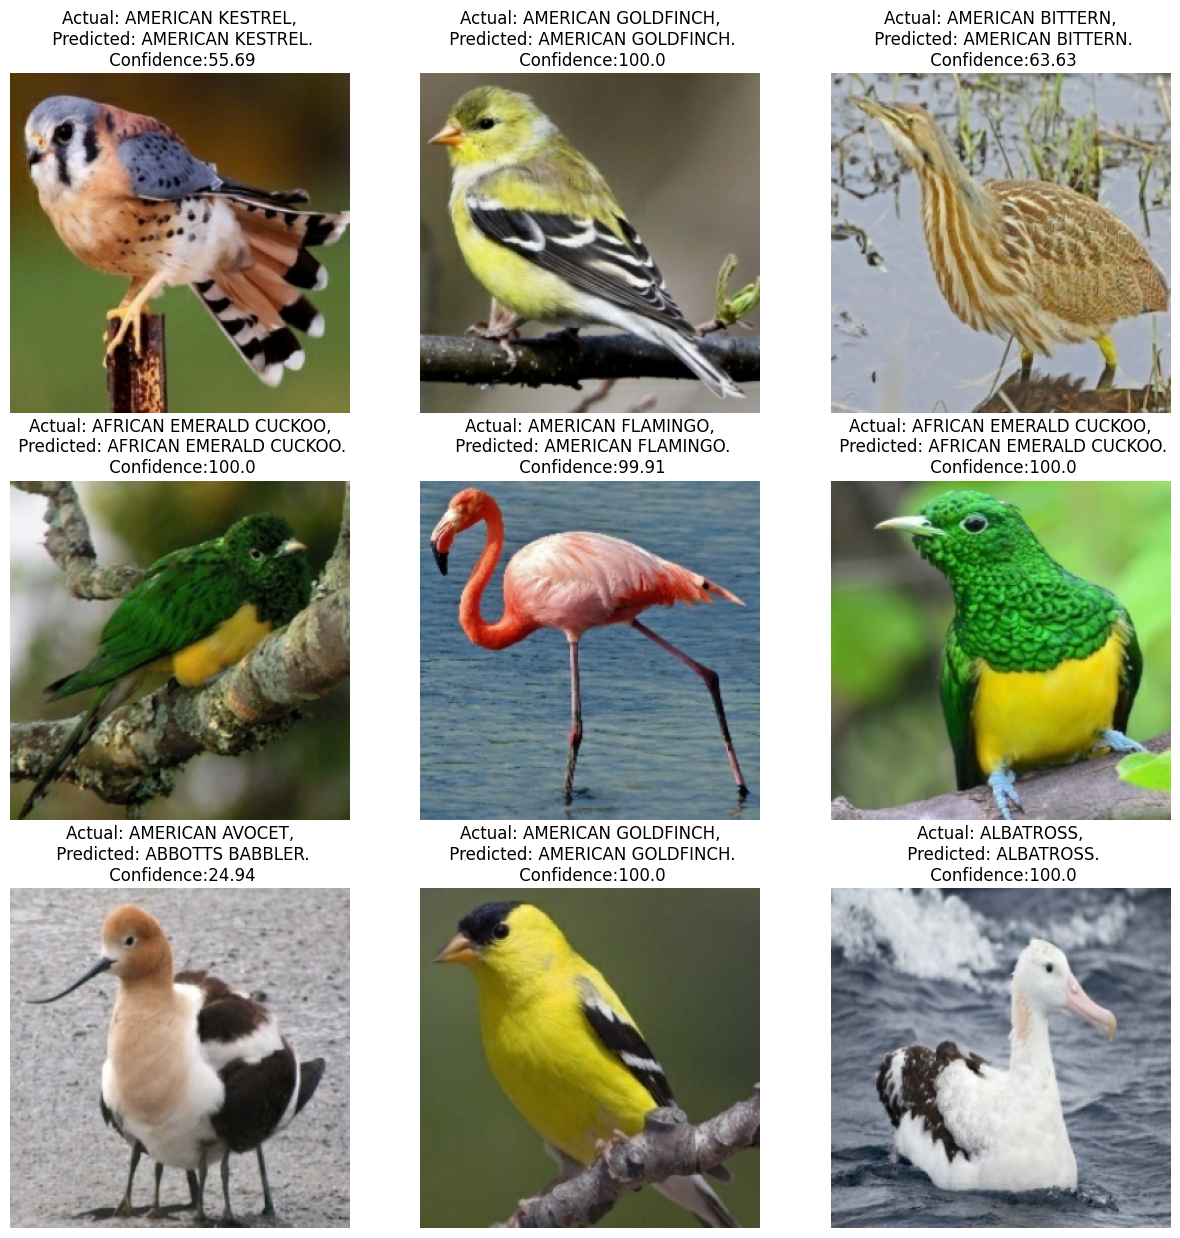

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy())

    predicted_class, confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]

    plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}')

    plt.axis("off")